In [1]:
"""
Reddit post binary subreddit classificaion (datascience, gameofthrones)
Using tf-idf with decision tree technique  
Module: praw, sklearn, pandas, matplotlib, graphviz
Result: accurency 99-100%
"""

'\nReddit post binary subreddit classificaion (datascience, gameofthrones)\nUsing tf-idf with decision tree technique  \nModule: praw, sklearn, pandas, matplotlib, graphviz\nResult: accurency 100%\n'

# Data Manage

In [2]:
!pip install praw

## Reddit Streaming
Get client_id and client_secret: https://www.reddit.com/prefs/apps

In [3]:
import praw
reddit = praw.Reddit(user_agent='hello_world',
                client_id='XXXX',
                client_secret='XXXX')

In [4]:
def reddit_streming(subreddits, limit):
  # data streaming

  dataset = {'title': [], 'label': []}

  for index, subreddit in enumerate(subreddits):
    for submission in reddit.subreddit(subreddit).hot(limit=number):
      title = submission.title
      label = index  # covert subreddit name to subreddit id
      # append data streming from reddit to dataset list
      dataset['title'].append(title)
      dataset['label'].append(label)
      
  return dataset

In [5]:
subreddits = ['datascience', 'gameofthrones']
number = 1000  # limit setting
dataset = reddit_streming(subreddits, number)

In [6]:
print(dataset)

{'title': ['DS Book Suggestions/Recommendations Megathread', "Weekly 'Entering & Transitioning' Thread. Questions about getting started and/or progressing towards becoming a Data Scientist go here.", 'I love what I do :))) I love data science', '[HIRING] Senior Data Scientist at Reddit', 'How do you interpret the coefficient of a tobit regression?', 'Pramp now allows you to practice data science interviews with other data scientists', 'Has anyone heard from Mckinsey Data Science?', 'How to consolidate a bunch of Jupyter notebooks??', 'A Little bit of Help/Advice', 'What is your preferred approach to parse tons of store receipt (txt) files?', 'Slack Channel for Daily Fantasy Sports and Data Science', 'Predicting Inpatient Admissions Based on Prior Diagnosis, Demographics, Medical Charts, etc.', 'Any tutorials on reinforcement learning application with Python?', "So, I type stuff into excel, and I use condition formatting and stuff... what's next?", "Tutorial on how to load StackOverflow

## Dump to Data Frame

In [7]:
import pandas as pd
df = pd.DataFrame(dataset)

In [8]:
df.info()  # data infomation

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 2 columns):
label    1488 non-null int64
title    1488 non-null object
dtypes: int64(1), object(1)
memory usage: 23.3+ KB


In [9]:
df  # data show
# df.head()

,label,title
0,0,DS Book Suggestions/Recommendations Megathread
1,0,Weekly 'Entering & Transitioning' Thread. Ques...
2,0,I love what I do :))) I love data science
3,0,[HIRING] Senior Data Scientist at Reddit
4,0,How do you interpret the coefficient of a tobi...
5,0,Pramp now allows you to practice data science ...
6,0,Has anyone heard from Mckinsey Data Science?
7,0,How to consolidate a bunch of Jupyter notebooks??
8,0,A Little bit of Help/Advice
9,0,What is your preferred approach to parse tons ...


datascience  =  894
gameofthrones  =  594


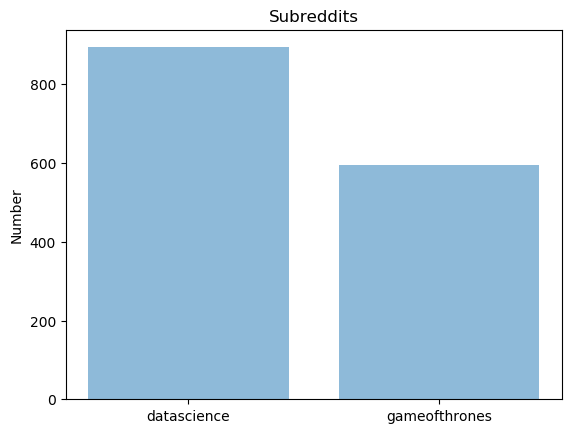

In [32]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()  
group_count = df.groupby('label').count()

performance = list(group_count['title'])
y_pos = np.arange(len(subreddits))
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, subreddits)
plt.ylabel('Number')
plt.title('Subreddits')

for index, value in enumerate(subreddits):
  print(value, ' = ', performance[index])
  
plt.show()

## Save Dataset

In [11]:
df.to_csv('dataset.csv', header=True, index=False)  # .csv file
# df.to_json('dataset.json')  # .json file

## Data spliting (Train - Test Split)
train 70%  
test 30%

In [12]:
x = df['title']
y = df['label']

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

# Feature Engineering

## Stop word

In [14]:
manual_stopwords = [',','.',')',',','(','m',"'m","n't",'e.g',"'ve",'s','#',
                    '/','``',"'s","''",'!','r',']','=','[','s','&','%','*',
                    '...','1','2','3','4','5','6','7','8','9','10','--',
                    "''",';','-',':']

In [15]:
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS

# union with manual_stopwords
stop_words = stop_words.union(manual_stopwords)

In [16]:
print(stop_words)

frozenset({'back', 'move', 'sometime', 'describe', 'across', 'any', 'first', 'had', 'hence', 'amoungst', 'whereafter', "'ve", 'although', 'call', 'through', 'ours', 'whereas', 'have', 'co', 'some', 'well', 'hers', 'forty', 'serious', 'her', 'then', 'onto', 'yet', 'elsewhere', 'please', 'another', '/', 'whatever', 'anyway', 'not', 'fifty', 'least', 'so', 'their', 'etc', 'we', 'fire', 'all', 'no', 'inc', 'now', 'every', 'towards', 'further', ']', 'over', 'system', 'when', 'being', 'nowhere', '...', '-', 'nothing', 'e.g', 'beyond', 'per', 'put', 'what', 'nobody', 'were', 'this', 'becoming', 'everything', 'therefore', 'down', 'of', 'whole', 'none', 'hasnt', 'six', 'mill', 'up', 'ltd', 'else', 'thereby', 'third', 'between', 'has', '4', 'fifteen', 'i', 'latter', 'which', 'cant', 'could', 'top', 'us', '6', 'if', 'thick', 's', 'amount', 'become', 'each', 'yourselves', 'eight', 'whom', 'yours', '!', '8', 'de', 'three', 'upon', 'became', 'during', 'that', 'perhaps', 'everywhere', 'already', 'to'

## Count Vectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

max_features = 20
count_vect = CountVectorizer(max_features=max_features, stop_words=stop_words)

In [18]:
print(count_vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=frozenset({'back', 'move', 'sometime', 'describe', 'across', 'any', 'first', 'had', 'hence', 'amoungst', 'whereafter', "'ve", 'although', 'call', 'through', 'ours', 'whereas', 'have', 'co', 'some', 'well', 'hers', 'forty', 'serious', 'her', 'then', 'onto', 'yet', 'elsewhere', 'please', 'a...in', 'may', 'me', 'hereby', 'beforehand', 'name', 'seeming', 'since', 'again', 'for', '1', 'after'}),
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


# Create Model

## Decision Tree

In [19]:
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.feature_extraction.text import TfidfTransformer

model = Pipeline([('vect', count_vect),
                  ('tfidf', TfidfTransformer()),
                  ('clf', tree.DecisionTreeClassifier()),])

model = model.fit(x_train, y_train)  # train model (run)

C:\Miniconda3\lib\site-packages\sklearn\feature_extraction\text.py:286: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ve'] not in stop_words.
  sorted(inconsistent))


In [20]:
# print feature names
print(count_vect.get_feature_names())

['best', 'data', 'game', 'got', 'help', 'interview', 'jon', 'learning', 'looking', 'machine', 'model', 'project', 'python', 'question', 'science', 'scientist', 'season', 'spoilers', 'thrones', 'using']


In [21]:
''' [NOTE] how to get model:
clf = model.named_steps['clf'] '''

" [NOTE] how to get model:\nclf = model.named_steps['clf'] "

# Evaluate Model

## Prediction

In [22]:
y_pred = model.predict(x_test)
print(y_pred)

[0 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 1 1 1 0 0
 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0
 0 1 0]


## Confusion matrix

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


Confusion matrix, without normalization
[[264   1]
 [  0 182]]


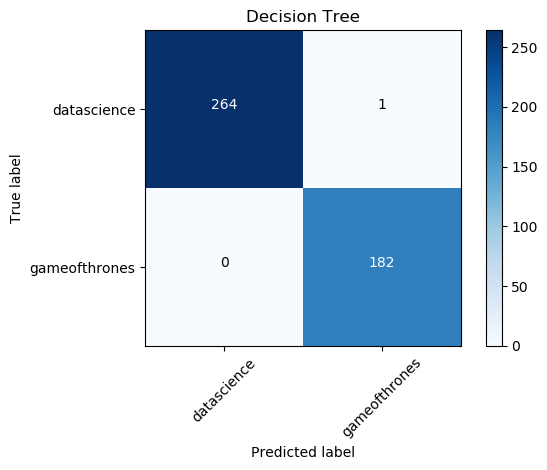

In [33]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)  # caculate Confusion matrix

plot_confusion_matrix(cnf_matrix, classes=subreddits,
                      title='Decision Tree')

plt.show()  # show

## Accuracy score

In [25]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred) * 100, '%')

99.77628635346755 %


## F-measure

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       265
           1       0.99      1.00      1.00       182

   micro avg       1.00      1.00      1.00       447
   macro avg       1.00      1.00      1.00       447
weighted avg       1.00      1.00      1.00       447



## Model Visualization
For windows: https://graphviz.gitlab.io/_pages/Download/Download_windows.html  
All OS: https://graphviz.gitlab.io/download/

In [27]:
# append graphviz program to os path
# append <...path...>\\bin
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\graphviz-2.38\\bin\\'

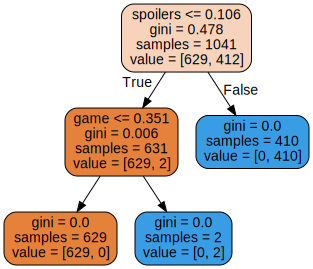

In [28]:
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source


feature_names = count_vect.get_feature_names()


graph = Source(export_graphviz(model.named_steps['clf'],
                               out_file=None,
                               feature_names=feature_names,
                               filled=True,
                               rounded=True))

graph.format = 'svg'  # filename tye (svg, png, pdf)
filename = 'reddit_submission_tree'
graph.render(filename)  # graph save
Source.from_file(filename)  # graph show

In [29]:
# filename = 'filename'
# graph.render(filename)  # graph save
# graph.render(filename, view=True)  # save and show graph

# Source.from_file(filename)  # load from file and show now

# SVG(graph.pipe(format='svg'))  show tree graph in notebook without save

# Save model

In [31]:
from sklearn.externals import joblib

filename = 'decision_tree.model'
joblib.dump(model, filename)

# joblib.load(filename)  # load model

['decision_tree.model']